# **Taller de distribuciones de muestreo y pruebas de hipótesis**

**integrantes:**


1.  Cristian Gonzalez Franco
2.  Flavio Arregoces Mercado




## Librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image
import os
import seaborn as sns

## Paso 1. Lectura de Archivos CS

Leer los archivos que resgistran los tiempos simulados de llegada de paquetes (outputs_parr.csv) y los tiempos de llegada de viajeros de la multitud(outputs_carr.csv). Guardar estos datos en data frames. Utilizar la función read_csv de pandas para leer los archivos en formato .csv

In [3]:
columns_names = ['origen_destino', 'llegada']

aqui se muestra la lectura y guardado del archivo de tiempos de llegadas de paquetes con mas de 500 mil datos

In [4]:
df_paquetes = pd.read_csv("outputs_parr.csv", header=None, names=columns_names)
df_paquetes

,origen_destino,llegada
0,"('Ostbahnhof', 'Hauptbahnhof')",0.000029
1,"('Ostbahnhof', 'Hauptbahnhof')",0.829230
2,"('Ostbahnhof', 'Hauptbahnhof')",1.106569
3,"('Ostbahnhof', 'Hauptbahnhof')",1.774625
4,"('Ostbahnhof', 'Hauptbahnhof')",2.526890
...,...,...
588222,"('Harthof', 'Innsbrucker Ring')",9.955963
588223,"('Harthof', 'Innsbrucker Ring')",6.427414
588224,"('Harthof', 'Innsbrucker Ring')",6.766989
588225,"('Harthof', 'Innsbrucker Ring')",8.904357


aqui se muestra la lectura y guardado del archivo de tiempos de llegadas de viajeros con mas de 800 mil datos

In [5]:
df_viajeros = pd.read_csv("outputs_carr.csv", header=None, names=columns_names)
df_viajeros

,origen_destino,llegada
0,"('Universitat', 'Sendlinger Tor')",0.000122
1,"('Universitat', 'Sendlinger Tor')",0.084532
2,"('Universitat', 'Sendlinger Tor')",0.340381
3,"('Universitat', 'Sendlinger Tor')",2.206567
4,"('Universitat', 'Sendlinger Tor')",3.810551
...,...,...
881212,"('Innsbrucker Ring', 'Westpark')",12.107973
881213,"('Innsbrucker Ring', 'Westpark')",12.530021
881214,"('Innsbrucker Ring', 'Westpark')",12.629620
881215,"('Innsbrucker Ring', 'Westpark')",13.474318


## Paso 2. Separar Origen y Destino

Cada archivo .csv tiene un campo con un texto entre paréntesis que muestra una tupla escrita como (‘origen’, ‘destino’) y otro campo numérico con el tiempo de llegada en horas. Extraer el texto correspondiente al origen y al destino del texto del archivo (‘origen’, ‘destino’) y escribirlos en dos campos distintos. El data frame resultante deberíatener un campo para el origen (texto), un campo para el destino (texto) y un campo para el tiempode llegada. Usar la función extractystripde pandas.

In [6]:
df_paquetes[['origen', 'destino']] = df_paquetes['origen_destino'].str.extract(r"\('([^']*)', '([^']*)'\)")
df_paquetes.drop(columns=['origen_destino'],inplace=True)
df_paquetes

,llegada,origen,destino
0,0.000029,Ostbahnhof,Hauptbahnhof
1,0.829230,Ostbahnhof,Hauptbahnhof
2,1.106569,Ostbahnhof,Hauptbahnhof
3,1.774625,Ostbahnhof,Hauptbahnhof
4,2.526890,Ostbahnhof,Hauptbahnhof
...,...,...,...
588222,9.955963,Harthof,Innsbrucker Ring
588223,6.427414,Harthof,Innsbrucker Ring
588224,6.766989,Harthof,Innsbrucker Ring
588225,8.904357,Harthof,Innsbrucker Ring


In [7]:
df_viajeros[['origen', 'destino']] = df_viajeros['origen_destino'].str.extract(r"\('([^']*)', '([^']*)'\)")
df_viajeros.drop(columns=['origen_destino'], inplace=True)
df_viajeros

,llegada,origen,destino
0,0.000122,Universitat,Sendlinger Tor
1,0.084532,Universitat,Sendlinger Tor
2,0.340381,Universitat,Sendlinger Tor
3,2.206567,Universitat,Sendlinger Tor
4,3.810551,Universitat,Sendlinger Tor
...,...,...,...
881212,12.107973,Innsbrucker Ring,Westpark
881213,12.530021,Innsbrucker Ring,Westpark
881214,12.629620,Innsbrucker Ring,Westpark
881215,13.474318,Innsbrucker Ring,Westpark


## Paso 3. Calcular el Tiempo entre Llegadas

Crear un nuevo campo para cada dataframe que contiene la información de paquetes y viajeros que calcule el tiempo entre llegadas de cada paquete (o viajero). El campo de tiempo original es el tiempo total transcurrido cuando el paquete(o viajero) llegó. Ordenar el dataframe de acuerdo con el tiempo de llegada y luego crear un campo que calcule el tiempo entre llegadas, es decir, la diferencia entre el tiempo de llegada de un paquete(o viajero) y el paquete (o viajero) anterior

In [8]:
df_paquetes = df_paquetes.sort_values(by='llegada')
df_paquetes['tiempo entre llegadas'] = df_paquetes['llegada'].diff().fillna(0)
df_paquetes

,llegada,origen,destino,tiempo entre llegadas
0,0.000029,Ostbahnhof,Hauptbahnhof,0.000000
209,0.000046,Milbertshofen,Feldmoching,0.000017
455674,0.000051,Westfriedhof,Laimer Platz,0.000005
100367,0.000121,Olympiazentrum,Thalkirchen,0.000071
401482,0.000129,Olympiazentrum,Neuperlach Zentrum,0.000008
...,...,...,...,...
222317,10.999959,Frankfurter Ring,Obersendling,0.000007
397101,10.999976,Isartor,Obermenzing,0.000017
159319,10.999981,Hauptbahnhof,Pasing,0.000005
104089,10.999984,Nordfriedhof,Studentenstadt,0.000003


In [9]:
df_viajeros = df_viajeros.sort_values(by='llegada')
df_viajeros['tiempo entre llegadas'] = df_viajeros['llegada'].diff().fillna(0)
df_viajeros

,llegada,origen,destino,tiempo entre llegadas
702478,0.000008,Karlsplatz,Bohmerwaldplatz,0.000000
463205,0.000014,Nordfriedhof,Frottmaning,0.000006
415046,0.000016,Thalkirchen,Rotkreuzplatz,0.000003
91057,0.000019,Obermenzing,Moosach,0.000003
0,0.000122,Universitat,Sendlinger Tor,0.000103
...,...,...,...,...
102368,13.999966,Westfriedhof,Frankfurter Ring,0.000015
621097,13.999968,Laim,Max-Weber-Platz,0.000002
439669,13.999977,Messestadt Ost,Moosach,0.000009
854140,13.999986,Neuperlach Sud,Moosach,0.000009


## Paso 4. Análisis de la Distribución del Tiempo entre Llegada

Analizar la distribución de la variable “tiempo entre llegadas” para cada variable (tiempo entre llegadas de paquetes y viajeros) guardadas en los dataframes respectivos. Realizar la descripción estadística de
cada variable, es decir, presentar estadísticos descriptivos de cada muestra (media, Q1, Q2, Q3, desviación estándar, coeficiente de asimetría y de curtosis).  Adicionalmente, graficar en matplotlib el histograma de frecuencias relativas y el diagrama de cajas para cada variable en un mismo lienzo de matplotlib. Discutir acerca de las medidas descriptivas incluyendo simetría y sesgo. Comparar la distribuciones de ambas variables y discutir diferencias y similitudes entre ambas. Teniendo en cuenta los estadísticos más adecuados y el contexto del sistema simulado, discutir acerca de la capacidad del sistema para suplir la demanda a través de la multitud de viajeros en la red. Usar la función describe de pandas para calcular estadísticos descriptivos y la función hist y boxplot de matplotlib para construir los histogramas y diagramas de caja, respectivamente. Crear un archivo de salida.png que muestre el gráfico creado en matplotlib, el archivo debe estar guardado en una subcarpeta co nel nombre outputs. Ver método savefig de matplotlib.


In [45]:
def generar_graficos(dataframes_columnas, nombre_archivo):
    """
    Genera histogramas de frecuencias relativas y diagramas de cajas para columnas específicas de varios DataFrames.

    :param dataframes_columnas: Lista de tuplas, cada una con un DataFrame de pandas y el nombre de la columna.
    :param nombre_archivo: Nombre del archivo de salida (sin extensión).
    :param numero_clases: Número de clases para el histograma.
    """

    # Crear subcarpeta para guardar la salida
    output_dir = 'outputs'
    os.makedirs(output_dir, exist_ok=True)

    # Determinar el número de subgráficos necesarios
    n = len(dataframes_columnas)

    # Crear un lienzo con subgráficos
    fig, axes = plt.subplots(n, 2, figsize=(15, 4 * n))

    for i, (df, columna, no_clases) in enumerate(dataframes_columnas):
        data = df

        # Histograma de frecuencias relativas
        axes[i, 0].hist(data, bins=no_clases, density=True, alpha=0.7)
        axes[i, 0].set_title(f'Histograma de frecuencias relativas ({columna})')
        axes[i, 0].set_xlabel('Valor')
        axes[i, 0].set_ylabel('Frecuencia relativa')

        # Diagrama de cajas
        axes[i, 1].boxplot(data, vert=False)
        axes[i, 1].set_title(f'Diagrama de cajas ({columna})')
        axes[i, 1].set_xlabel('Valor')

    # Ajustar el layout para que no se solapen los títulos
    plt.tight_layout()

    # Guardar el gráfico en un archivo
    output_path = os.path.join(output_dir, f'{nombre_archivo}.png')
    plt.savefig(output_path)
    plt.close()

    return output_path

### Tiempo entre llegadas Paquetes

In [11]:
descripciones_paquetes = df_paquetes['tiempo entre llegadas'].describe()
descripciones_paquetes

count    588227.000000
mean          0.000019
std           0.000019
min           0.000000
25%           0.000005
50%           0.000013
75%           0.000026
max           0.000246
Name: tiempo entre llegadas, dtype: float64

In [12]:
coeficiente_asimetría_paquetes = df_paquetes['tiempo entre llegadas'].skew()
coeficiente_asimetría_paquetes

1.984270834135946

In [13]:
coeficiente_apuntamiento_paquetes = df_paquetes['tiempo entre llegadas'].kurt()
coeficiente_apuntamiento_paquetes

5.8412332128037825

Estadísticos descriptivos de los tiempos entre llegadas de los paquetes (todos los valores exceptuando el tamaño del conjunto estan en horas):

$N = 588227$

$\mu = 0.000019  \hspace{0.25cm} (horas) \hspace{1cm} σ = 0.000019 \hspace{0.25cm} (horas)$

$Q_1 = 0.000005 \hspace{1cm}  Q_2 = 0.000013 \hspace{1cm} Q_3 = 0.000026 $

$CA_s = 1.984 \hspace{1cm} CA_p = 5.8413$

In [14]:
num_clases_paquetes = int(round(1 + 3.3*math.log10(df_paquetes['tiempo entre llegadas'].shape[0]),0))
num_clases_paquetes

20

### Tiempo entre llegadas Viajeros

In [16]:
descripciones_viajeros = df_viajeros['tiempo entre llegadas'].describe()
descripciones_viajeros

count    881217.000000
mean          0.000016
std           0.000016
min           0.000000
25%           0.000005
50%           0.000011
75%           0.000022
max           0.000223
Name: tiempo entre llegadas, dtype: float64

In [17]:
coeficiente_asimetría_viajeros = df_viajeros['tiempo entre llegadas'].skew()
coeficiente_asimetría_viajeros

2.0023189213155823

In [18]:
coeficiente_apuntamiento_viajeros = df_viajeros['tiempo entre llegadas'].kurt()
coeficiente_apuntamiento_viajeros

5.99812111298873

Estadísticos descriptivos de los tiempos entre llegadas de los viajeros a los puntos de entrega (todos los valores exceptuando el tamaño del conjunto estan en horas):

$N = 881217$

$\mu = 0.000016  \hspace{0.25cm} (horas) \hspace{1cm} σ = 0.000016 \hspace{0.25cm} (horas)$

$Q_1 = 0.000005 \hspace{1cm}  Q_2 = 0.000011 \hspace{1cm} Q_3 = 0.000022 $

$CA_s = 2.01 \hspace{1cm} CA_p = 5.998$

In [19]:
num_clases_viajeros = int(round(1 + 3.3*math.log10(df_viajeros['tiempo entre llegadas'].shape[0]),0))
num_clases_viajeros

21

### creacion de graficos

In [47]:
df_paquetes_viajeros = [(df_paquetes['tiempo entre llegadas'], 'paquetes',num_clases_paquetes),
                        (df_viajeros['tiempo entre llegadas'], 'viajeros',num_clases_viajeros)]

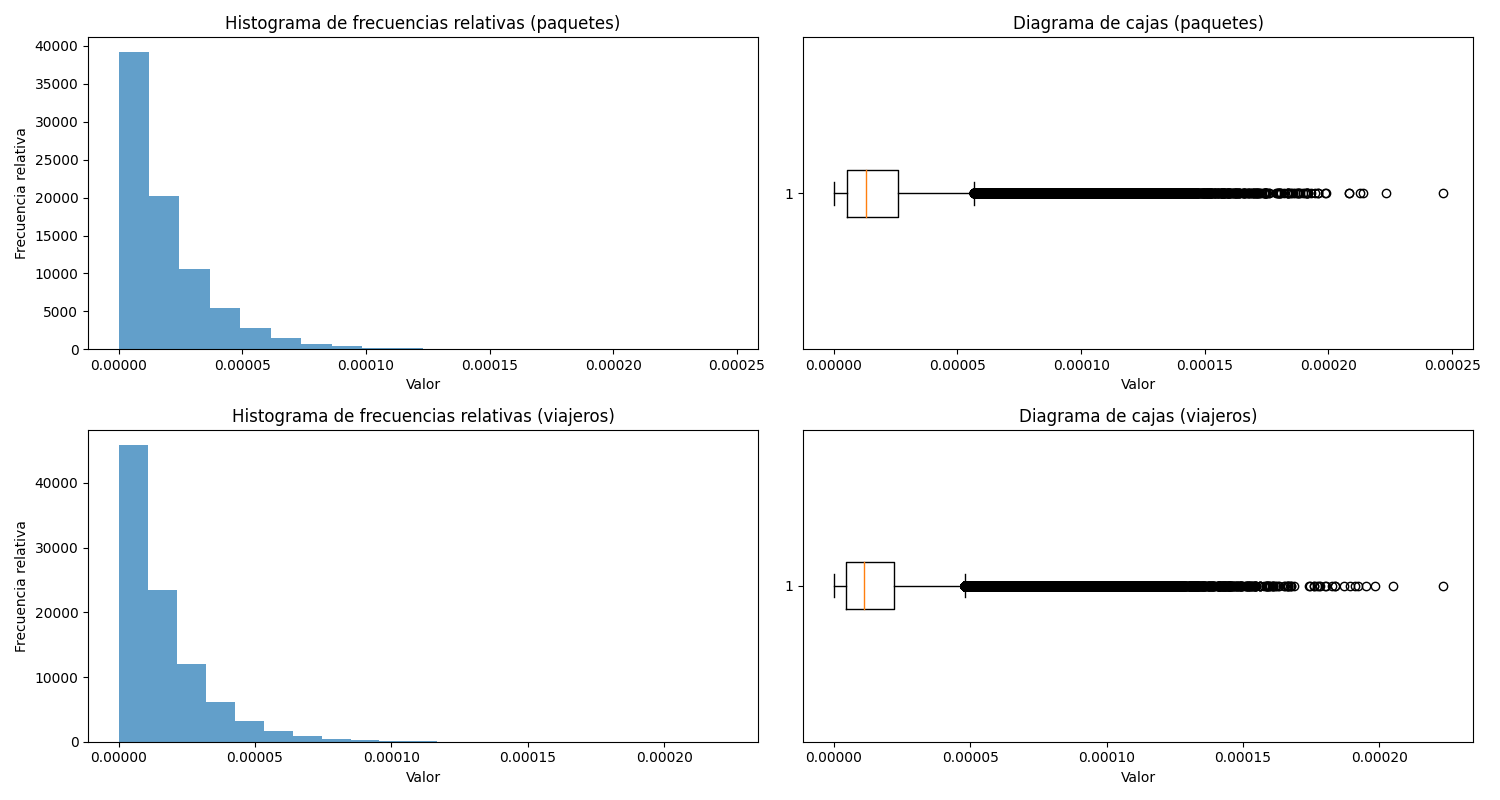

In [49]:
ruta_archivo = generar_graficos(df_paquetes_viajeros,'distribucion_tiempos')
Image(filename=ruta_archivo)

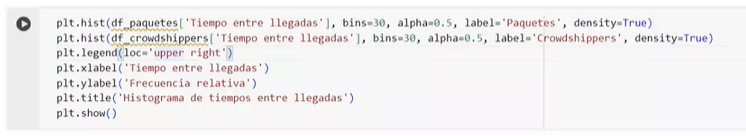

### Comparacion

ambas distribuciones parecen ser exponencial, con muchos datos aberrantes, sesgo positivo, mucho apuntamiento o graficas leptocurticas, media y desviacion estandar del mismo valor y con valores semejantes entre ellos asi como una distribucion muy cargada a la izquierda.

## Paso 5. Plantear Hipótesis sobre la Distribución y Realizar Prueba de Bondad de Ajuste

Plantear una hipótesis acerca de la distribución de probabilidad de cada variable. Basándose en la forma de las distribuciones observadas y los estadísticos descriptivos, plantear una hipótesis sobre la distribución de probabilidad de cada variable (por ejemplo, distribución exponencial, normal, log-normal, etc.). Luego, realizar una prueba de bondad de ajuste Kolmogorov-Smirnov para verificar si los tiempos entre llegadas siguen la distribución planteada. Usar la función kstest de Scipy.

### Prueba de hipotesis tiempos entre llegadas paquetes

In [21]:
from scipy.stats import kstest, expon

params_paquetes = expon.fit(df_paquetes['tiempo entre llegadas'])
print(params_paquetes)

(0.0, 1.870020411224955e-05)


$H_0:$ el tiempo entre llegadas de paquetes (horas) se ajusta a una distribucion exponencial con parametros $λ = 1.8701\times 10^{-5}$

\\
$H_1:$ el tiempo entre llegadas de paquetes (horas) NO se ajusta a una distribucion exponencial

In [22]:
ks_stat_paquetes, p_value_paquetes = kstest(df_paquetes['tiempo entre llegadas'], 'expon', args=params_paquetes)

print(f"KS Test para Paquetes: Estadístico KS = {ks_stat_paquetes}, p-valor = {p_value_paquetes}")


KS Test para Paquetes: Estadístico KS = 0.0008213239314434073, p-valor = 0.8220429709326039


es bastante probable observar lo que observe asi que no se rechaza la idea de que nuestros datos si sigan una distribucion de probabilidades exponencial

### Prueba de hipotesis tiempos entre llegadas viajeros

In [23]:
from scipy.stats import kstest, expon

params_viajeros = expon.fit(df_viajeros['tiempo entre llegadas'])
print(params_viajeros)

(0.0, 1.588710351797085e-05)


$H_0:$ el tiempo entre llegadas de los viajeros (horas) se ajusta a una distribucion exponencial con parametros $λ = 1.588\times 10^{-5}$

\\
$H_1:$ el tiempo entre llegadas de paquetes (horas) NO se ajusta a una distribucion exponencial


In [24]:
ks_stat_viajeros, p_value_viajeros = kstest(df_viajeros['tiempo entre llegadas'], 'expon', args=params_viajeros)

print(f"KS Test para los viajeros: Estadístico KS = {p_value_viajeros}, p-valor = {p_value_viajeros}")


KS Test para los viajeros: Estadístico KS = 0.15603258821636423, p-valor = 0.15603258821636423


es bastante probable observar lo que observe asi que no se rechaza la idea de que nuestros datos si sigan una distribucion de probabilidades exponencial

## Paso 6. Creación de data frame de Muestras Aleatorias

Desde el data frame respectivo que contiene las (N) observaciones de tiempos entre llegadas de paquetes y viajeros, extraer aleatoriamente (M=10000) muestras de tamaño (n=50). Construir un data frame (para cada variable) que contenga ordenadas las (M) muestras como columnas y las (n) observaciones en las filas.

In [25]:
M = 1000
n = 50

### data frame muestras de paquetes

In [26]:
arrival_times_paquetes = df_paquetes['tiempo entre llegadas'].values

samples = np.zeros((n, M))

for i in range(M):
    samples[:, i] = np.random.choice(arrival_times_paquetes, n, replace=False)

df_muestras_paquetes = pd.DataFrame(samples)
df_muestras_paquetes

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,6.933597e-07,9.839597e-07,0.000051,0.000018,4.440475e-05,2.819864e-06,1.545168e-05,5.900724e-06,1.660112e-06,1.607937e-05,...,4.066321e-06,1.180881e-05,2.417274e-06,8.777296e-06,5.436005e-06,2.208016e-06,0.000011,1.064299e-05,4.475422e-05,2.530522e-05
1,1.546602e-06,1.313194e-05,0.000006,0.000028,6.442204e-05,9.471253e-06,6.271895e-06,9.859703e-07,1.617827e-06,1.542711e-05,...,2.345596e-05,1.238608e-05,3.390953e-06,1.575568e-05,1.620474e-05,1.469849e-05,0.000034,1.703894e-05,4.265622e-07,3.851256e-06
2,9.900173e-06,4.134290e-05,0.000032,0.000004,2.433914e-06,9.842315e-06,2.931094e-05,1.877883e-06,5.290120e-05,2.522150e-05,...,5.947698e-07,4.741720e-06,2.565461e-06,1.636967e-05,2.350641e-05,1.121870e-06,0.000001,3.334980e-05,1.492676e-06,7.700840e-06
3,8.131165e-06,3.337218e-06,0.000013,0.000069,1.091935e-05,7.039904e-07,1.942354e-06,4.196731e-06,1.971674e-05,1.407320e-05,...,5.673353e-06,2.985366e-05,2.522647e-05,3.969264e-05,1.664355e-06,2.514624e-05,0.000009,1.117488e-05,9.603366e-06,9.203290e-06
4,5.963439e-06,2.043409e-06,0.000002,0.000019,2.890814e-05,8.733997e-06,3.127267e-06,5.105045e-05,5.482640e-06,6.893623e-07,...,4.017542e-06,2.904145e-05,7.438040e-05,5.925856e-06,6.079463e-06,7.788952e-06,0.000019,7.911054e-06,6.529685e-06,1.206604e-05
5,3.657368e-05,1.120113e-05,0.000042,0.000003,8.996938e-06,2.631339e-05,7.264435e-06,3.283325e-06,9.679053e-06,4.837844e-05,...,7.303592e-06,3.755749e-06,1.518651e-06,2.763952e-05,4.449617e-05,2.147634e-05,0.000031,2.885987e-05,1.941849e-06,8.289745e-06
6,5.515344e-06,2.682287e-05,0.000058,0.000013,5.840203e-05,3.891712e-06,2.050853e-06,2.303663e-05,1.717987e-06,4.936776e-05,...,9.521736e-06,9.405696e-06,9.083354e-06,9.738217e-08,1.003556e-06,1.349376e-07,0.000006,1.990430e-05,1.948010e-05,3.456987e-05
7,1.813873e-05,8.361447e-06,0.000015,0.000065,2.290604e-05,5.654283e-05,6.814905e-06,2.956977e-05,1.647450e-05,4.754053e-06,...,1.208113e-05,1.554347e-05,6.827228e-06,2.453681e-06,5.607039e-06,1.081483e-05,0.000030,2.627321e-05,1.021238e-05,3.816539e-05
8,3.696982e-05,1.716816e-05,0.000005,0.000019,2.983838e-05,2.543622e-06,1.648945e-05,3.585590e-05,1.308946e-05,2.892123e-05,...,1.575388e-05,9.421794e-06,1.143891e-05,5.568564e-06,1.175207e-04,5.569705e-06,0.000003,1.260922e-05,1.244292e-05,7.053235e-05
9,3.647967e-06,1.098535e-05,0.000018,0.000049,8.646504e-06,4.817273e-06,3.360350e-06,1.240069e-05,4.926535e-06,1.340591e-07,...,7.416636e-05,1.160621e-04,2.921456e-05,3.108775e-06,2.963805e-05,1.277915e-05,0.000015,1.832491e-05,3.428678e-06,1.325082e-05


### data frame muestras de viajeros

In [27]:
arrival_times_viajeros = df_viajeros['tiempo entre llegadas'].values

samples = np.zeros((n, M))

for i in range(M):
    samples[:, i] = np.random.choice(arrival_times_viajeros, n, replace=False)

df_muestras_viajeros = pd.DataFrame(samples)
df_muestras_viajeros

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.103781e-05,1.771485e-05,1.197973e-06,1.220335e-05,1.542796e-05,1.068289e-05,2.582420e-05,2.301333e-07,3.087329e-06,2.299518e-05,...,1.607068e-05,3.874431e-06,1.627649e-05,2.489275e-06,3.291621e-06,3.895172e-05,2.386610e-05,6.191715e-06,5.728906e-06,4.341338e-05
1,2.099740e-06,6.912954e-06,4.440397e-05,4.259228e-06,2.919752e-07,5.710784e-06,6.681572e-05,3.814391e-05,1.561774e-05,1.018247e-05,...,8.840372e-06,8.033800e-07,4.430733e-06,1.803197e-05,7.641971e-07,5.419421e-06,9.284344e-06,1.761086e-06,1.509822e-06,5.554298e-06
2,1.363172e-05,5.007631e-06,8.725899e-06,2.067465e-05,3.011784e-05,1.014089e-05,1.231883e-05,2.584209e-05,2.428901e-06,9.133966e-06,...,1.297872e-05,2.595629e-05,1.264138e-05,1.971721e-05,6.585948e-06,3.386435e-05,2.924005e-05,1.196493e-05,2.114191e-05,1.059257e-05
3,9.488781e-06,6.973291e-08,9.750367e-07,1.627615e-06,1.023102e-05,9.693440e-06,6.300028e-05,4.514835e-06,8.021232e-07,1.602839e-05,...,2.943963e-05,1.309597e-05,1.307477e-07,2.253421e-05,1.336833e-05,1.714231e-05,1.601624e-05,2.289133e-05,1.704298e-06,3.121535e-06
4,3.470567e-05,9.345658e-06,5.545572e-06,2.188871e-05,8.226608e-05,1.733721e-07,6.156857e-06,1.368456e-06,1.640760e-05,2.212916e-05,...,4.529230e-05,3.865892e-06,1.150838e-06,5.580514e-05,1.574823e-06,1.130985e-05,5.430067e-07,1.052329e-05,3.203032e-05,2.781905e-07
5,1.022587e-05,4.739914e-06,2.519867e-05,3.928150e-05,3.597425e-05,2.355786e-06,5.742457e-05,1.029681e-05,5.310180e-06,8.482351e-06,...,1.147439e-05,3.967986e-05,1.242690e-05,4.351122e-05,1.328810e-05,1.616445e-05,1.708387e-05,1.716541e-05,2.769501e-05,3.404512e-05
6,4.569684e-06,1.087059e-05,6.679257e-06,3.061642e-06,3.212467e-06,4.156363e-05,2.616655e-05,3.311483e-06,1.543648e-05,1.672120e-05,...,2.614604e-06,3.280649e-05,9.394908e-05,2.369543e-05,1.357754e-06,5.505376e-06,1.585550e-05,1.993040e-06,2.988062e-06,1.448718e-05
7,2.605708e-05,2.164181e-06,1.692162e-05,8.677030e-07,1.169842e-05,1.345419e-05,1.927590e-06,1.166440e-05,2.798894e-05,1.331012e-05,...,4.962913e-06,6.607972e-06,6.507244e-07,3.012002e-05,1.310749e-05,1.766340e-05,5.607912e-06,2.689467e-05,1.895018e-06,1.911313e-05
8,4.693289e-06,1.171581e-05,1.915277e-06,2.680739e-05,5.062424e-06,2.339891e-07,4.144791e-06,1.250180e-05,5.560930e-06,9.961829e-06,...,3.426876e-05,5.682332e-06,1.237381e-05,1.210579e-05,1.062896e-05,2.840250e-05,4.117406e-07,5.184473e-05,1.118486e-05,5.083122e-05
9,2.714494e-06,7.415477e-06,1.060920e-06,1.263554e-05,1.080064e-05,6.312950e-05,1.787697e-05,5.270001e-06,1.687580e-05,1.971832e-05,...,3.097921e-05,2.159099e-06,3.874376e-05,2.569539e-05,3.250879e-06,1.379672e-05,4.258620e-05,4.013948e-06,1.365112e-05,5.139703e-05


## Paso 7. Análisis de las Medias Muestrales y Prueba de Hipótesis

Calcular la media muestral para cada una de las (M) muestras, guardando sus valores en un vector que puede ser una lista, un array de NumPy o un data frame de pandas. Describir la distribución del conjunto de las(M) medias muestrales y compararla con la distribución de frecuencias de los datos de tiempo entre llegadas originales. ¿Qué puede concluir respecto a la distribución de probabilidad de las medias muestrales? ¿Qué diferencias hay entre la distribución de muestreo de la media y la distribución de probabilidad de la variable original (población)? ¿Esto es evidencia empírica de alguna teoría vista en clase (soportada por algún teorema)?. Luego, con cada muestra extraída de cada variable,realizar una prueba de hipótesis para inferir si el tiempo promedio entre llegadas al sistema decrowdshipping es de 2 segundos.  Establecer un nivel de significancia, y ejecutar las (M×2)pruebas de hipótesis. Calcular la proporción de pruebas de hipótesis que resultaron en rechazo y no rechazo.Proporcionar una interpretación de sus resultados asumiendo cada uno de los escenarios dichos

In [28]:
from scipy.stats import ttest_1samp

nivel_significancia = 0.05

### Pruebas de Hipotesis de las muestras de paquetes

In [29]:
medias_paquetes = df_muestras_paquetes.mean(axis=0)

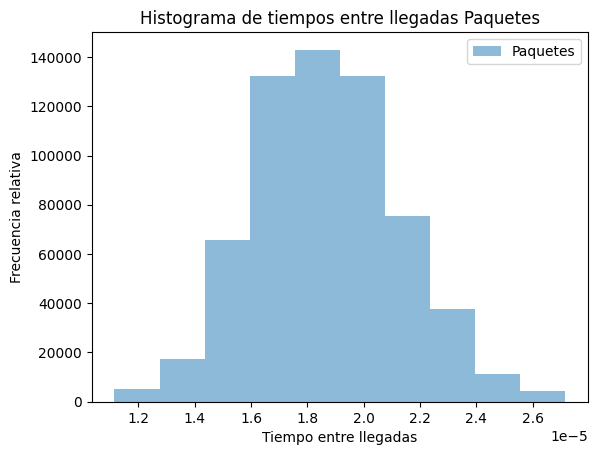

In [50]:
# Histograma de tiempos entre llegadas para paquetes
plt.hist(medias_paquetes, alpha=0.5, label='Paquetes', density=True)

plt.legend(loc='upper right')
plt.xlabel('Tiempo entre llegadas')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de tiempos entre llegadas Paquetes')
plt.show()

se puede concluir viendo la grafica de las medias muestrales que estas siguen una distribucion de probabilidad normal, esto contrasta con lo anteriormente calculado donde la poblacion total de datos seguia una distribucion de probabilidades exponencial,con todo lo anterior se puede demostrar empiricamente el teorema del limite central, que dicta que para muestras mas grande que 30 se puede usar una aproximacion normal para la asuncion de la distribucion de probabilidades de la poblacion

$H_0:$ el tiempo promedio entre llegadas de paquetes al sistema de crowdshipping es de 2 segundos.


$H_1:$ el tiempo promedio entre llegadas de paquetes al sistema de crowdshipping No es de 2 segundos.

In [31]:
rechazos_paquetes = (ttest_1samp(medias_paquetes, 1/1800)[1] < nivel_significancia).sum()
print(f"Proporción de aceptados para paquetes: {1-(rechazos_paquetes /M)}")
print(f"Proporción de rechazos para paquetes: {rechazos_paquetes /M}")

Proporción de aceptados para paquetes: 0.999
Proporción de rechazos para paquetes: 0.001


se puede afirmar que en promedio, a la larga y de una manera aleatoria llegan alrededor de 25198 paquetes en un día de operación de 14 horas lo que equivalente a un promedio de 2 segundos entre llegadas de paquetes al sistema, por lo que no se rechaza la hipotesis principal o $H_0$, todo lo anterior respalda el escenario a.

### Pruebas de Hipotesis de las muestras de viajeros

In [32]:
medias_viajeros = df_muestras_viajeros.mean(axis=0)

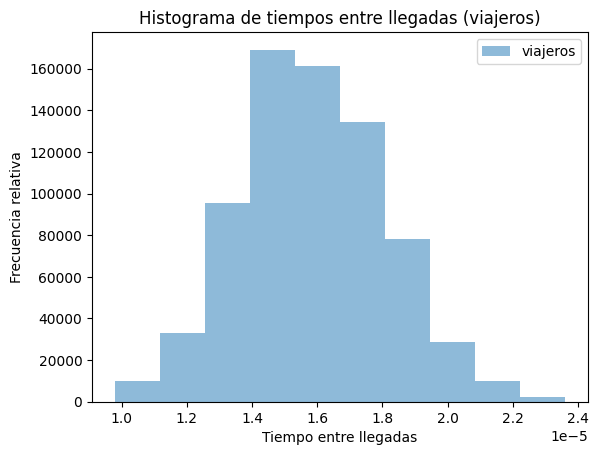

In [33]:
# Histograma de tiempos entre llegadas para viajeros
plt.hist(medias_viajeros, alpha=0.5, label='viajeros', density=True)

plt.legend(loc='upper right')
plt.xlabel('Tiempo entre llegadas')
plt.ylabel('Frecuencia relativa')
plt.title('Histograma de tiempos entre llegadas (viajeros)')
plt.show()

se puede concluir viendo la grafica de las medias muestrales que estas siguen una distribucion de probabilidad normal, esto contrasta con lo anteriormente calculado donde la poblacion total de datos seguia una distribucion de probabilidades exponencial,con todo lo anterior se puede demostrar empiricamente el teorema del limite central, que dicta que para muestras mas grande que 30 se puede usar una aproximacion normal para la asuncion de la distribucion de probabilidades de la poblacion

$H_0:$ el tiempo promedio entre llegadas de viajeros al sistema de crowdshipping es de 2 segundos.


$H_1:$ el tiempo promedio entre llegadas de viajeros al sistema de crowdshipping No es de 2 segundos.

In [40]:
rechazos_viajeros = (ttest_1samp(medias_viajeros, 1/1800)[1] < nivel_significancia).sum()
print(f"Proporción de aceptados para viajeros: {1-(rechazos_viajeros /M)}")
print(f"Proporción de rechazos para viajeros: {rechazos_viajeros /M}")

Proporción de aceptados para viajeros: 0.999
Proporción de rechazos para viajeros: 0.001


la proporcio de pruebas de hipotesis aceptadas es bastante alta por lo que no se rechaza $H_0$, pudiendose afirmar que el escenario a es valido por lo que en realidad llegan en promedio alrededor de 25198 viajeros en un día deoperación de 14 horas (equivalente a un promedio de 2 segundos entre llegadas de paquetes al sistema), siendo esta afirmacion la misma que nuestra hipotesis principal

## Paso 8. Conteo de Paquetes y Viajeros por Origen-Destino
Para cada variable de tiempo entre llegadas, contar el número de paquetes (y de viajeros) que se observaron para cada par origen-destino, es decir, una matriz que muestre el numero de paquetes y viajeros, respectivamente, que viajaron desde cada origen y hacia cada destino. Guardar en data frames nuevos. Escribir los resultados en archivos .csv separados en la carpeta outputs.

### Experimento 1 (red balanceada)

In [35]:
conteo_paquetes =  df_paquetes.groupby(['origen', 'destino']).size().reset_index(name="conteo paquetes")
conteo_paquetes

,origen,destino,conteo paquetes
0,Arabellapark,Bohmerwaldplatz,252
1,Arabellapark,Donnersbergerbrucke,239
2,Arabellapark,Feldmoching,236
3,Arabellapark,Frankfurter Ring,259
4,Arabellapark,Freimann,270
...,...,...,...
2445,Westpark,Thalkirchen,222
2446,Westpark,Theresienstrasse,271
2447,Westpark,Trudering,243
2448,Westpark,Universitat,202


In [36]:
conteo_viajeros =  df_viajeros.groupby(['origen', 'destino']).size().reset_index(name="conteo viajeros")
conteo_viajeros

,origen,destino,conteo viajeros
0,Arabellapark,Bohmerwaldplatz,368
1,Arabellapark,Donnersbergerbrucke,363
2,Arabellapark,Feldmoching,340
3,Arabellapark,Frankfurter Ring,295
4,Arabellapark,Freimann,399
...,...,...,...
2445,Westpark,Thalkirchen,311
2446,Westpark,Theresienstrasse,341
2447,Westpark,Trudering,307
2448,Westpark,Universitat,305


### Experimento 2 (red No balanceada)

In [51]:
df_paquetes_2 = pd.read_csv("outputs_parr_2.csv", header=None, names=columns_names)
df_paquetes_2[['origen', 'destino']] = df_paquetes_2['origen_destino'].str.extract(r"\('([^']*)', '([^']*)'\)")
conteo_paquetes_2 =  df_paquetes_2.groupby(['origen', 'destino']).size().reset_index(name="conteo paquetes")
conteo_paquetes_2

,origen,destino,conteo paquetes
0,Arabellapark,Bohmerwaldplatz,203
1,Arabellapark,Donnersbergerbrucke,283
2,Arabellapark,Feldmoching,222
3,Arabellapark,Frankfurter Ring,238
4,Arabellapark,Freimann,230
...,...,...,...
2445,Westpark,Thalkirchen,207
2446,Westpark,Theresienstrasse,244
2447,Westpark,Trudering,214
2448,Westpark,Universitat,213


In [52]:
df_viajeros_2 = pd.read_csv("outputs_carr_2.csv", header=None, names=columns_names)
df_viajeros_2[['origen', 'destino']] = df_viajeros_2['origen_destino'].str.extract(r"\('([^']*)', '([^']*)'\)")
conteo_viajeros_2 =  df_viajeros_2.groupby(['origen', 'destino']).size().reset_index(name="conteo viajeros")
conteo_viajeros_2

,origen,destino,conteo viajeros
0,Arabellapark,Bohmerwaldplatz,120
1,Arabellapark,Donnersbergerbrucke,259
2,Arabellapark,Feldmoching,220
3,Arabellapark,Frankfurter Ring,127
4,Arabellapark,Freimann,133
...,...,...,...
2445,Westpark,Thalkirchen,78
2446,Westpark,Theresienstrasse,403
2447,Westpark,Trudering,119
2448,Westpark,Universitat,419


### Union

In [63]:
conteo_paquetes_1y2 = pd.concat([df_paquetes, df_paquetes_2], ignore_index=True).groupby(['origen', 'destino']).size().reset_index(name="conteo paquetes")
conteo_paquetes_1y2

,origen,destino,conteo paquetes
0,Arabellapark,Bohmerwaldplatz,455
1,Arabellapark,Donnersbergerbrucke,522
2,Arabellapark,Feldmoching,458
3,Arabellapark,Frankfurter Ring,497
4,Arabellapark,Freimann,500
...,...,...,...
2445,Westpark,Thalkirchen,429
2446,Westpark,Theresienstrasse,515
2447,Westpark,Trudering,457
2448,Westpark,Universitat,415


In [62]:
conteo_viajeros_1y2 = pd.concat([df_viajeros, df_viajeros_2], ignore_index=True).groupby(['origen', 'destino']).size().reset_index(name="conteo viajeros")
conteo_viajeros_1y2

,origen,destino,conteo viajeros
0,Arabellapark,Bohmerwaldplatz,488
1,Arabellapark,Donnersbergerbrucke,622
2,Arabellapark,Feldmoching,560
3,Arabellapark,Frankfurter Ring,422
4,Arabellapark,Freimann,532
...,...,...,...
2445,Westpark,Thalkirchen,389
2446,Westpark,Theresienstrasse,744
2447,Westpark,Trudering,426
2448,Westpark,Universitat,724


### Guardado

In [37]:
def save_dataframe_to_csv(dataframe, filename, output_dir='outputs'):
    """
    Guarda un DataFrame en un archivo .csv en un directorio especificado.

    Parameters:
    - dataframe: pd.DataFrame
    - filename: nombre de archivo (sin extensión) para el DataFrame
    - output_dir: directorio donde se guardará el archivo .csv (por defecto 'outputs')
    """
    # Asegurarse de que el directorio de salida existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Crear la ruta completa del archivo
    csv_path = os.path.join(output_dir, f"{filename}.csv")

    # Guardar el DataFrame en el archivo .csv
    dataframe.to_csv(csv_path, index=False)
    print(f"DataFrame guardado en: {csv_path}")

In [64]:
save_dataframe_to_csv(conteo_paquetes_1y2,'paquetes_o-d')
save_dataframe_to_csv(conteo_viajeros_1y2,'viajeros_o-d')

DataFrame guardado en: outputs/paquetes_o-d.csv
DataFrame guardado en: outputs/viajeros_o-d.csv


## Paso 9. Data frame con Paquetes por Ubicación y Mapa de Calor
Para cada variable,crear data frames que muestren el número total de paquetes que salen de cada ubicación en una columna y en la otra el número total de paquetes que llegaron a esa ubicación. Usar los nombresde las estaciones de tren subterráneo de Múnich (U-Bahn) como índices de cada fila en cada dataframe. Luego, utilizando las coordenadas de estas estaciones (que pueden consultar con Gmaps,por ejemplo), construir un mapa de calor en matplotlib que ilustre el número total de paquetes que salieron y entraron en cada ubicación, es decir, la distribución geográfica de del flujo de paquetes yde viajeros en la ciudad, respectivamente. Crear un gráfico separado para cada variable. Guardarlos gráficos en archivos .png separados en la carpeta outputs

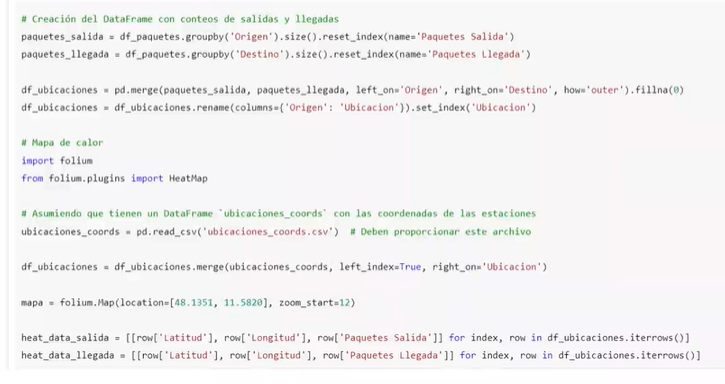

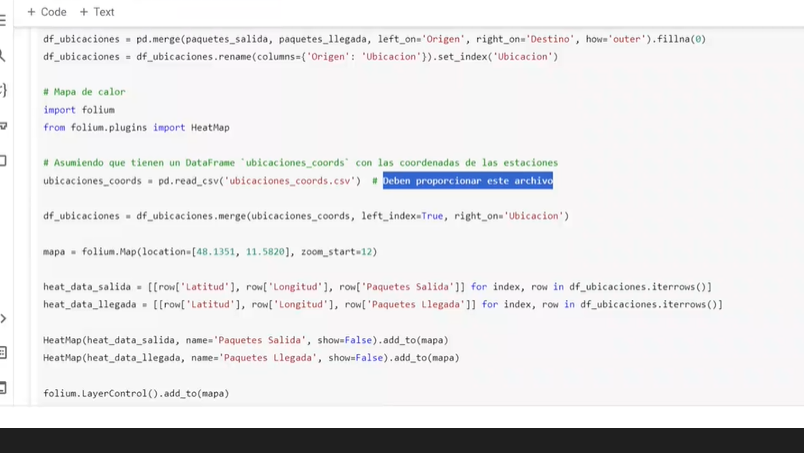

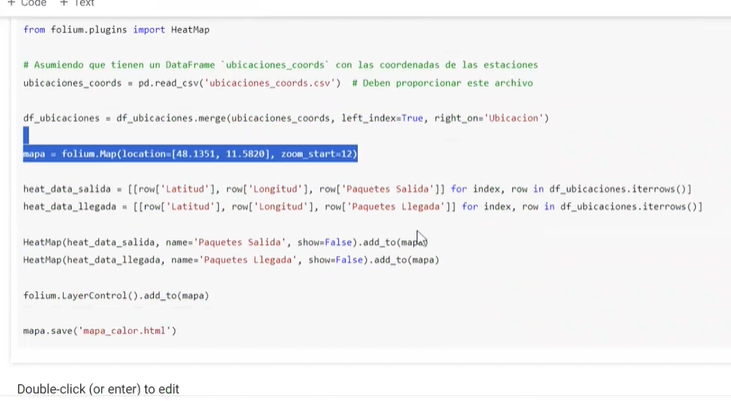

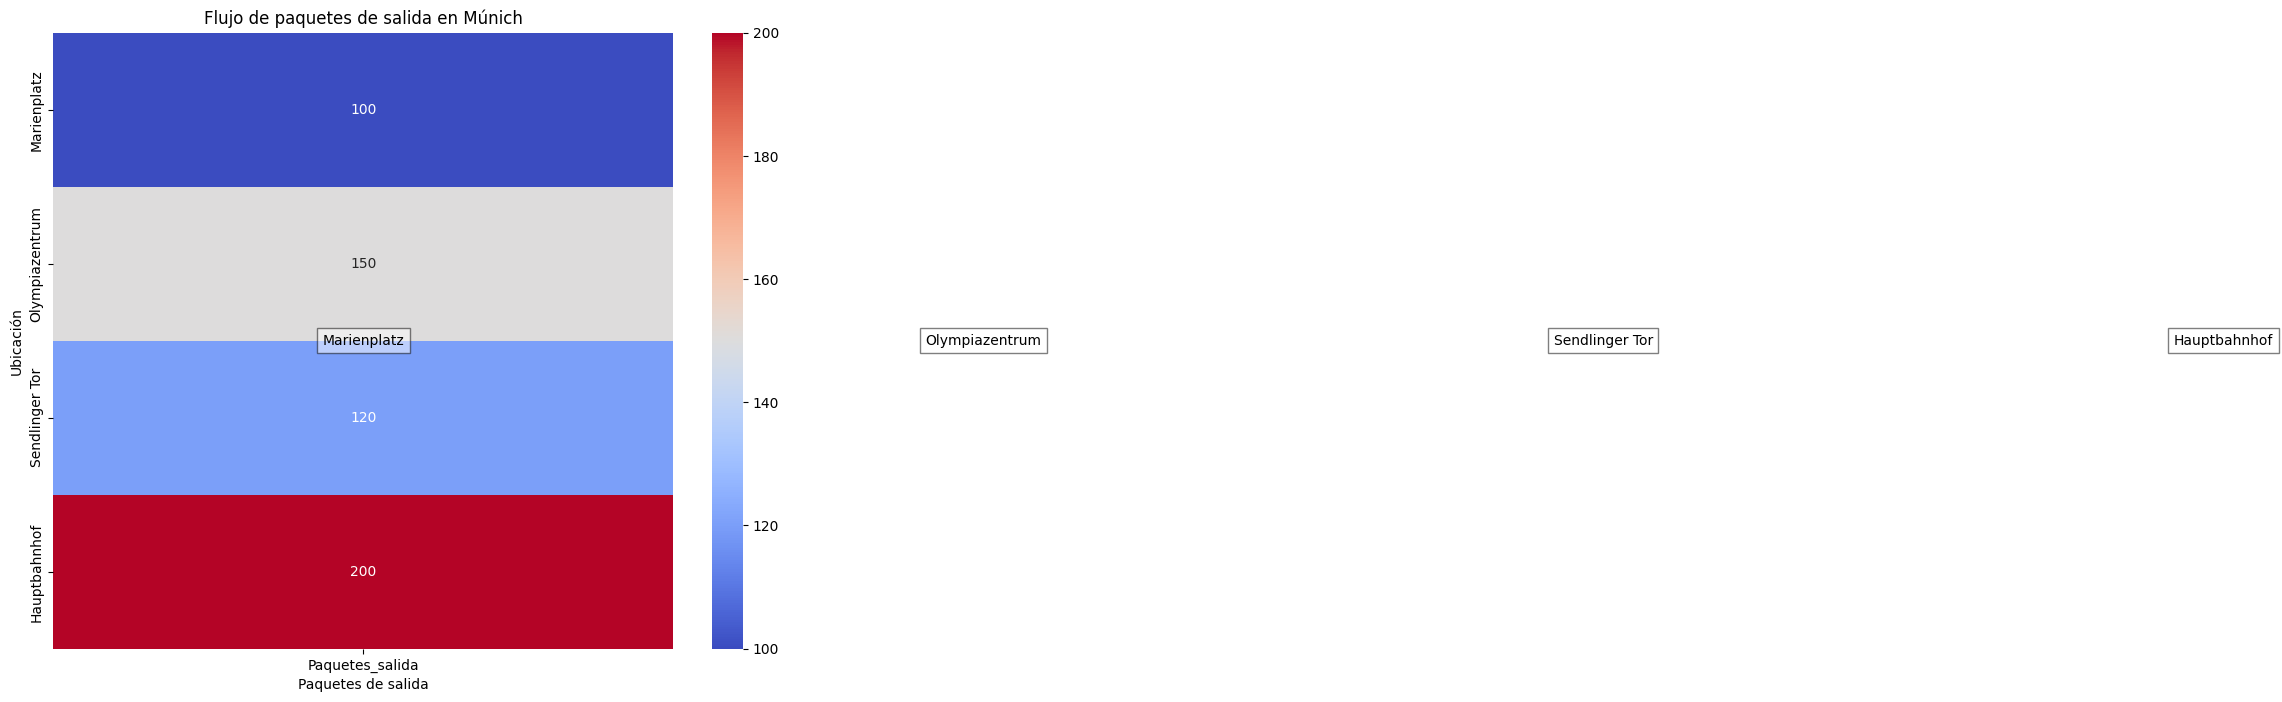

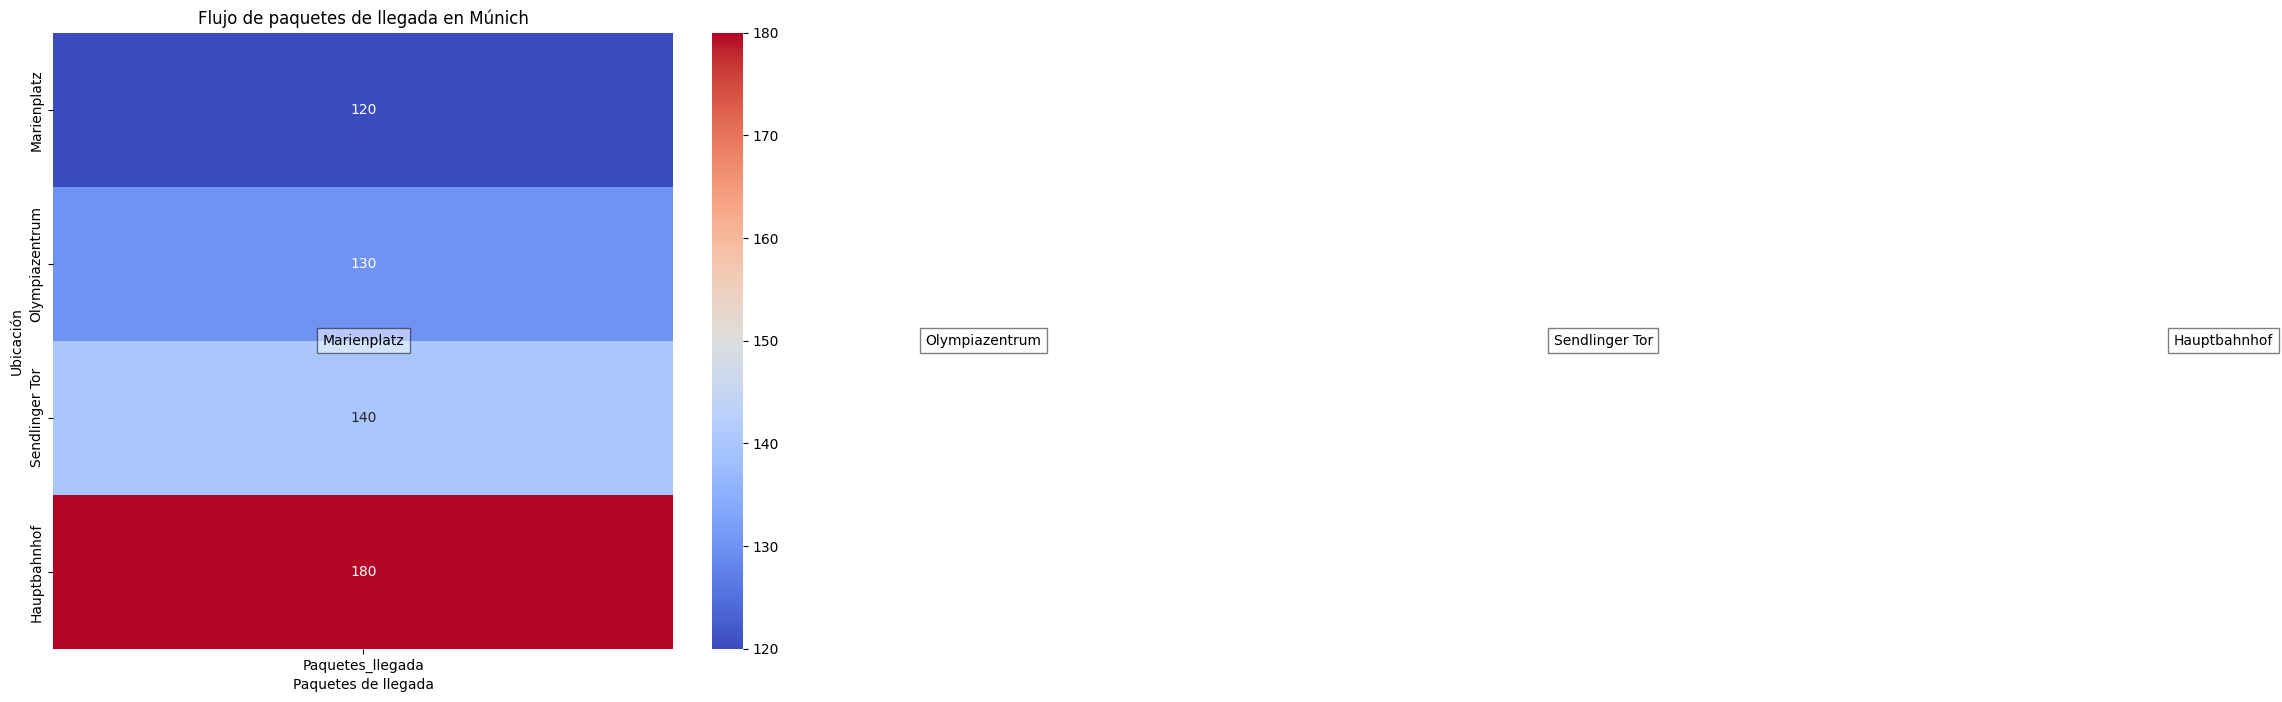

In [39]:
# Datos simulados de flujo de paquetes
datos = {
    'Ubicación': ['Marienplatz', 'Olympiazentrum', 'Sendlinger Tor', 'Hauptbahnhof'],
    'Paquetes_salida': [100, 150, 120, 200],
    'Paquetes_llegada': [120, 130, 140, 180]
}

# Crear dataframes
df_salida = pd.DataFrame(datos, columns=['Ubicación', 'Paquetes_salida']).set_index('Ubicación')
df_llegada = pd.DataFrame(datos, columns=['Ubicación', 'Paquetes_llegada']).set_index('Ubicación')

# Coordenadas de las estaciones de tren subterráneo de Múnich (ejemplo)
coordenadas = {
    'Marienplatz': (48.137154, 11.575561),
    'Olympiazentrum': (48.175746, 11.551692),
    'Sendlinger Tor': (48.134431, 11.567567),
    'Hauptbahnhof': (48.140247, 11.558405)
}

# Crear mapa de calor para paquetes de salida
plt.figure(figsize=(10, 8))
sns.heatmap(df_salida, annot=True, cmap='coolwarm', fmt='g')
plt.title('Flujo de paquetes de salida en Múnich')
plt.xlabel('Paquetes de salida')
plt.ylabel('Ubicación')

# Añadir marcadores en el mapa de calor
for ubicacion, (lat, lon) in coordenadas.items():
    plt.text(df_salida.index.get_loc(ubicacion) + 0.5, 0.5, ubicacion, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5),
             transform=plt.gca().transAxes)

plt.savefig('outputs/flujo_salida.png')
plt.show()

# Crear mapa de calor para paquetes de llegada
plt.figure(figsize=(10, 8))
sns.heatmap(df_llegada, annot=True, cmap='coolwarm', fmt='g')
plt.title('Flujo de paquetes de llegada en Múnich')
plt.xlabel('Paquetes de llegada')
plt.ylabel('Ubicación')

# Añadir marcadores en el mapa de calor
for ubicacion, (lat, lon) in coordenadas.items():
    plt.text(df_llegada.index.get_loc(ubicacion) + 0.5, 0.5, ubicacion, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5),
             transform=plt.gca().transAxes)

plt.savefig('outputs/flujo_llegada.png')
plt.show()
